In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

items = pd.read_csv("Csv_limpios/steam_items_limpio.csv")
reviews = pd.read_csv("Csv_limpios/steam_reviews_limpio.csv")
steam_games = pd.read_csv("Csv_limpios/steam_games_limpio.csv")

EDA Steam Items

In [2]:
items

user_id  items_count  item_id  \
0        76561197970982479          277       10   
1        76561197970982479          277       20   
2        76561197970982479          277       30   
3        76561197970982479          277       40   
4        76561197970982479          277       50   
...                    ...          ...      ...   
5170010  76561198329548331            7   373330   
5170011  76561198329548331            7   388490   
5170012  76561198329548331            7   521570   
5170013  76561198329548331            7   519140   
5170014  edward_tremethick            0        0   

                             item_name  playtime_forever  playtime_2weeks  
0                       Counter-Strike               6.0              0.0  
1                Team Fortress Classic               0.0              0.0  
2                        Day of Defeat               7.0              0.0  
3                   Deathmatch Classic               0.0              0.0  
4            Half-Life: Opposing Force               0.0              0.0  
...                                ...               ...              ...  
5170010                    All Is Dust               0.0              0.0  
5170011  One Way To Die: Steam Edition               3.0              3.0  
5170012          You Have 10 Seconds 2               4.0              4.0  
5170013                     Minds Eyes               3.0              3.0  
5170014                            NaN               NaN              NaN  

[5170015 rows x 6 columns]

In [20]:
items.describe(include="all")

user_id   items_count       item_id    item_name  playtime_forever  \
count   5170015  5.170015e+06  5.170015e+06      5153209      5.153209e+06   
unique    87626           NaN           NaN        10947               NaN   
top     phrostb           NaN           NaN  Dota 2 Test               NaN   
freq       7762           NaN           NaN        49571               NaN   
mean        NaN  3.136999e+02  1.778681e+05          NaN      9.914951e+02   
std         NaN  6.924635e+02  1.320366e+05          NaN      5.418204e+03   
min         NaN  0.000000e+00  0.000000e+00          NaN      0.000000e+00   
25%         NaN  7.100000e+01  3.427000e+04          NaN      0.000000e+00   
50%         NaN  1.370000e+02  2.141700e+05          NaN      3.400000e+01   
75%         NaN  2.750000e+02  2.661300e+05          NaN      3.550000e+02   
max         NaN  7.762000e+03  5.307200e+05          NaN      6.427730e+05   

        playtime_2weeks  
count      5.153209e+06  
unique              NaN  
top                 NaN  
freq                NaN  
mean       9.104707e+00  
std        1.403926e+02  
min        0.000000e+00  
25%        0.000000e+00  
50%        0.000000e+00  
75%        0.000000e+00  
max        1.996700e+04

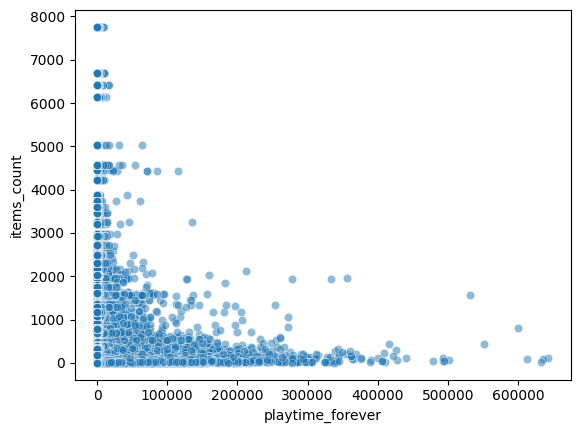

In [3]:
#Hacemos un scatterplot viendo la relacion que hay entre las horas y la cantidad de items
sns.scatterplot(data= items, x="playtime_forever", y="items_count", alpha=0.5)
plt.show()

In [4]:
"""
Podemos observar que no necesariamente mientras mas horas jugadas tenga alguien, no necesariamente tiene mas items.
Vemos que algunas personas con muchas horas tienen 0 items y otras que tienen 0 horas tienen muchos items, esto puede
ser porque algunos usuarios con 0 horas usan los items para comerciar y ganar plata
"""

'\nPodemos observar que no necesariamente mientras mas horas jugadas tenga alguien, no necesariamente tiene mas items.\nVemos que algunas personas con muchas horas tienen 0 items y otras que tienen 0 horas tienen muchos items, esto puede\nser porque algunos usuarios con 0 horas usan los items para comerciar y ganar plata\n'

In [5]:
#Agrupamos los juegos por su nombre y sumamos las horas totales
items_juegos_horas = items.groupby("item_name")["playtime_forever"].sum().reset_index()
items_juegos_horas

item_name  playtime_forever
0                      神明的一天世界(God's One Day World)            6969.0
1      ! That Bastard Is Trying To Steal Our Gold !             742.0
2            "Glow Ball" - The billiard puzzle game              21.0
3                                     #SelfieTennis             261.0
4                                          #SkiJump               0.0
...                                             ...               ...
10942                   丛林守望者（Ranger of the jungle）            2255.0
10943                          侠客风云传(Tale of Wuxia)           19288.0
10944                             大海战 Navy Field IV             126.0
10945                        神楽道中記(KaguraDouchuuki)            4337.0
10946               軒轅劍外傳穹之扉(The Gate of Firmament)            3695.0

[10947 rows x 2 columns]

In [6]:
#Juego con menos horas jugadas:
#Ordenamos por la cantidad de horas totales en orden ascendente y traemos el primer elemento
items_juegos_horas = items_juegos_horas.sort_values(by="playtime_forever", ascending=True)
print("Juego con menos horas: ", items_juegos_horas.head(1))

#Juego con mas horas jugadas
#Ordenamos por la cantidad de horas totales en orden descendente y traemos el primer elemento
items_juegos_horas = items_juegos_horas.sort_values(by="playtime_forever", ascending=False)
print("Juego con mas horas: ", items_juegos_horas.head(1))

Juego con menos horas:        item_name  playtime_forever
9107  The Abbey               0.0
Juego con mas horas:                               item_name  playtime_forever
2117  Counter-Strike: Global Offensive       785184267.0


Steam Games

In [7]:
steam_games

genres                title  price      id   año
0          Action  Lost Summoner Kitty   4.99  761140  2018
1          Casual  Lost Summoner Kitty   4.99  761140  2018
2           Indie  Lost Summoner Kitty   4.99  761140  2018
3      Simulation  Lost Summoner Kitty   4.99  761140  2018
4        Strategy  Lost Summoner Kitty   4.99  761140  2018
...           ...                  ...    ...     ...   ...
72706       Indie        Russian Roads   1.99  610660  2018
72707      Racing        Russian Roads   1.99  610660  2018
72708  Simulation        Russian Roads   1.99  610660  2018
72709      Casual  EXIT 2 - Directions   4.99  658870  2017
72710       Indie  EXIT 2 - Directions   4.99  658870  2017

[72711 rows x 5 columns]

In [8]:
steam_games.describe(include="all")

genres        title         price            id           año
count   71508        72711  72711.000000  7.271100e+04  72711.000000
unique     22        30009           NaN           NaN           NaN
top     Indie  AutoTileSet           NaN           NaN           NaN
freq    15847           11           NaN           NaN           NaN
mean      NaN          NaN      8.399463  4.634156e+05   2015.193630
std       NaN          NaN     15.848810  1.738769e+05      2.925281
min       NaN          NaN      0.000000  0.000000e+00   1970.000000
25%       NaN          NaN      1.990000  3.426350e+05   2015.000000
50%       NaN          NaN      4.990000  4.577100e+05   2016.000000
75%       NaN          NaN      9.990000  5.994405e+05   2017.000000
max       NaN          NaN    995.000000  2.028850e+06   2021.000000

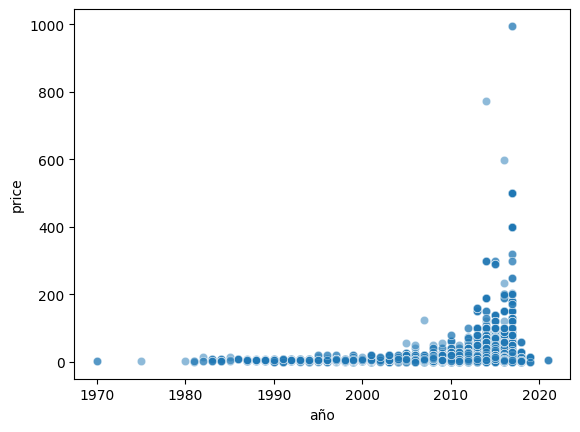

In [9]:
sns.scatterplot(data=steam_games, x="año", y="price", alpha=0.5)
plt.show()

In [10]:
"""
Podemos ver que a medida que pasa el tiempo, el precio de los juegos tiende a subir
"""

'\nPodemos ver que a medida que pasa el tiempo, el precio de los juegos tiende a subir\n'

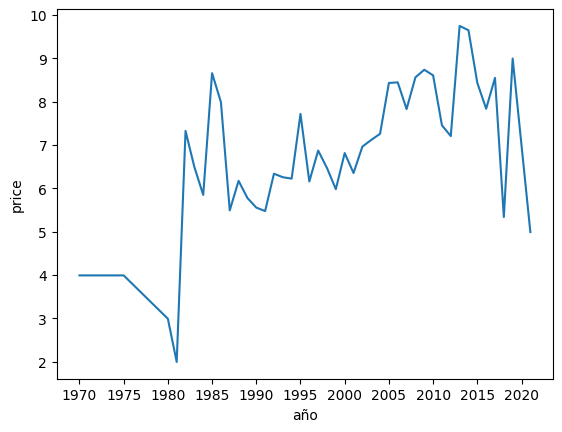

In [11]:
#Promedio de precios de los juegos de steam por año
steam_año_precio = steam_games.groupby("año")["price"].mean().reset_index()
steam_año_precio
sns.lineplot(data = steam_año_precio, x="año", y="price")
plt.xticks(range(steam_año_precio["año"].min(), steam_año_precio["año"].max() + 1, 5))
plt.show()

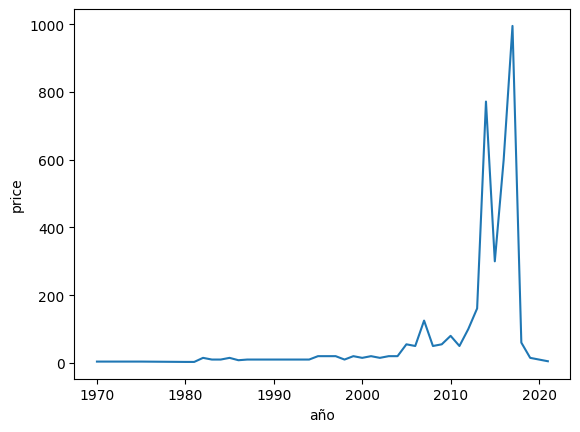

In [12]:
#El precio del juego mas caro por año
#Agrupamos por el año y el precio maximo
steam_año_precio = steam_games.groupby("año")["price"].max().reset_index()
#Hacemos un grafico de lineas con el año y el precio
sns.lineplot(data = steam_año_precio, x="año", y="price")
plt.show()

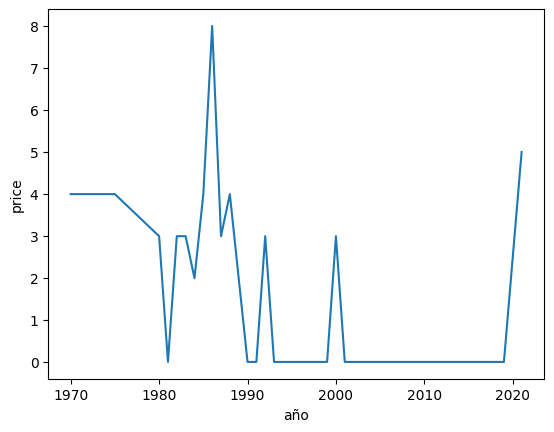

In [13]:
#El precio del juego mas barato por año
#Filtramos las filas que su precio sea 0
steam_año_precio = steam_año_precio[steam_año_precio["price"] != 0]
#Agrupamos por el año y el precio minimo
steam_año_precio = steam_games.groupby("año")["price"].min().reset_index()
#Hacemos un grafico de lineas con el año y el precio
sns.lineplot(data = steam_año_precio, x="año", y="price")
plt.show()

User reviews

In [14]:
reviews

user_id  item_id  recommend    year  sentiment_analysis
0         76561197970982479     1250          1  2011.0                   2
1         76561197970982479    22200          1  2011.0                   2
2         76561197970982479    43110          1  2011.0                   2
3                   js41637   251610          1  2014.0                   2
4                   js41637   227300          1  2013.0                   2
...                     ...      ...        ...     ...                 ...
58426  Fuckfhaisjnsnsjakaka       70          1  2015.0                   2
58427            3214213216   362890          1  2015.0                   2
58428          ChrisCoroner   273110          1  2015.0                   2
58429      CaptainAmericaCw      730          1  2015.0                   1
58430     76561198267374962      440          1  2015.0                   2

[58431 rows x 5 columns]

In [21]:
reviews.describe(include="all")

user_id        item_id     recommend          year  \
count       58431   58431.000000  58431.000000  58431.000000   
unique      25467            NaN           NaN           NaN   
top     Norf_Norf            NaN           NaN           NaN   
freq           10            NaN           NaN           NaN   
mean          NaN  169703.670586      0.884667   2014.154712   
std           NaN  132019.789420      0.319426      0.845779   
min           NaN      10.000000      0.000000   2010.000000   
25%           NaN    8930.000000      1.000000   2014.000000   
50%           NaN  218230.000000      1.000000   2014.000000   
75%           NaN  261640.000000      1.000000   2015.000000   
max           NaN  527340.000000      1.000000   2015.000000   

        sentiment_analysis  
count         58431.000000  
unique                 NaN  
top                    NaN  
freq                   NaN  
mean              1.457069  
std               0.767628  
min               0.000000  
25%               1.000000  
50%               2.000000  
75%               2.000000  
max               2.000000

In [15]:
ypositivo = (len(reviews[reviews["sentiment_analysis"] == 2]) / len(reviews)) * 100
yneutral = (len(reviews[reviews["sentiment_analysis"] == 1]) / len(reviews)) * 100
ynegativo = (len(reviews[reviews["sentiment_analysis"] == 0]) / len(reviews)) * 100

In [16]:
datos = pd.DataFrame()
datos["reseñas_positivas"] = pd.Series(ypositivo)
datos["reseñas_neutrales"] = pd.Series(yneutral)
datos["reseñas_negativas"] = pd.Series(ynegativo)
datos

reseñas_positivas  reseñas_neutrales  reseñas_negativas
0          62.761206          20.184491          17.054303

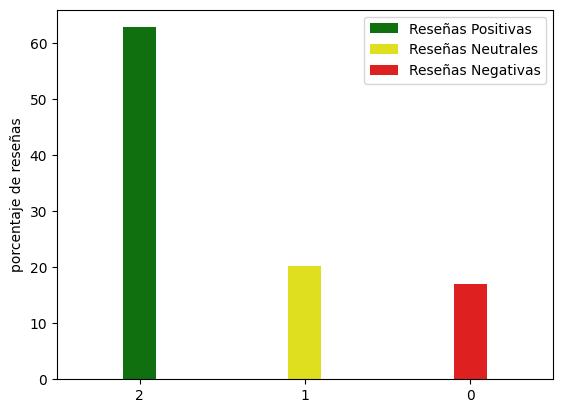

In [17]:
sns.barplot(x=2, y="reseñas_positivas", data=datos, color="green", label="Reseñas Positivas", width=0.2)
sns.barplot(x=1, y="reseñas_neutrales", data=datos, color="yellow", label="Reseñas Neutrales", width=0.2)
sns.barplot(x=0 , y="reseñas_negativas", data=datos, color="red", label="Reseñas Negativas", width=0.2)
plt.ylabel("porcentaje de reseñas")
plt.show()

In [18]:
"""
Podemos ver que la mayoria de las reseñas son positivas, le siguen las neutrales y por ultimo las negativas
"""

'\nPodemos ver que la mayoria de las reseñas son positivas, le siguen las neutrales y por ultimo las negativas\n'

<Axes: >

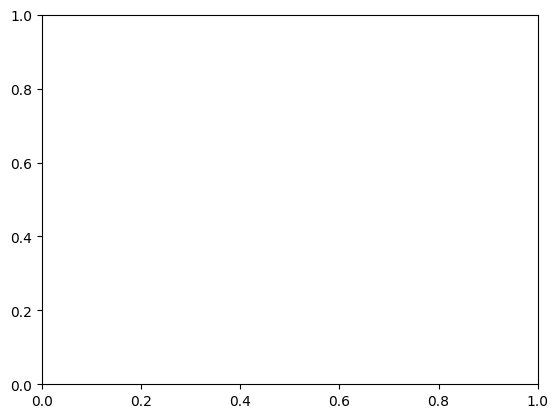

In [19]:
plt.subplot()